Christian Hansen
Exploring Homeless data for CTA


In [2]:
ls

2017-01-22_homeless_summary_categorical_numeric.csv
2017-01-22_homeless_summary_categorical_string.csv
classify_utils.py
homeless_3_projects_outcome.csv
homeless_row_per_enrollment.csv
homeless_row_per_enrollment_one_hot_encode.csv
practice.ipynb


## GOAL: Segment homeless population by projects

### See if any program has any real advantage of helping a homeless person in the the system circulation


In [3]:
import time as time
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.datasets.samples_generator import make_swiss_roll
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [4]:
df_features = pd.read_csv('2017-01-22_homeless_summary_categorical_numeric.csv')

In [5]:
df_features.shape

(11362, 97)

In [6]:
df_features.head()

,Personal ID,chronic_homeless,client_age_at_entry,continuously_homeless_one_year,days_enrolled,days_to_residential_move_in,disabling_condition,domestic_violence_victim,dv_currently_fleeing,enrollments,...,disability_type_alcoholdrug,disability_type_developmental,disability_type_substance,disability_type_physical,disability_type_chronichealth,disability_type_hearing,disability_type_alcohol,disability_type_vision,disability_type_drug,disability_type_mentalhealth
0,173781,0,35,0,147,NaN,0,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,173782,0,10,1,147,NaN,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,173783,0,12,1,147,NaN,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,173803,0,32,0,78,NaN,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,173804,0,11,0,78,NaN,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_features.columns

Index([u'Personal ID', u'chronic_homeless', u'client_age_at_entry',
       u'continuously_homeless_one_year', u'days_enrolled',
       u'days_to_residential_move_in', u'disabling_condition',
       u'domestic_violence_victim', u'dv_currently_fleeing', u'enrollments',
       u'ethnicity_latino', u'ethnicity_nonlatino', u'ethnicity_unknown',
       u'gender_female', u'gender_male', u'gender_unknown',
       u'head_of_household', u'housing_status_project_start_atrisk',
       u'housing_status_project_start_cat1homeless',
       u'housing_status_project_start_cat2risklosing',
       u'housing_status_project_start_cat3homelessfedstatutes',
       u'housing_status_project_start_cat4fleeingdv',
       u'housing_status_project_start_housed',
       u'housing_status_project_start_unknown', u'in_permanent_housing',
       u'living_situation_before_program_entry_detoxcenter',
       u'living_situation_before_program_entry_emershelter',
       u'living_situation_before_program_entry_family',
     

In [8]:
## Clustering data for a few features

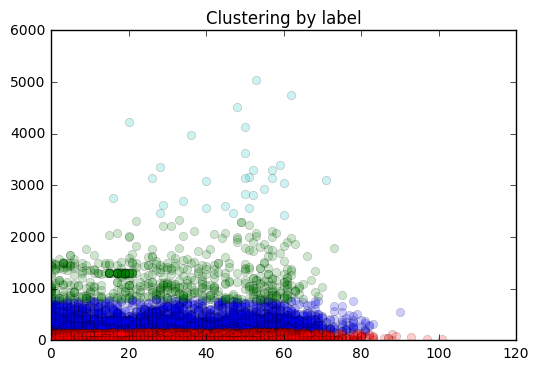

In [9]:
data = df_features[['client_age_at_entry','days_enrolled']]
agc = AgglomerativeClustering(n_clusters= 4)
agc.fit(data)
label = agc.labels_
fig = plt.figure()
for l in np.unique(label):
    plt.plot(data.iloc[ label == l, 0], data.iloc[ label == l, 1],'o',alpha =0.2)
plt.title('Clustering by label')

## Trying PCA on my data and then agglomorative clustering

In [10]:
df_features.dropna(inplace = True,axis = 1)

In [11]:
import numpy as np
from sklearn.decomposition import PCA
X = df_features
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X))

print(pca.explained_variance_ratio_) 

[  9.99878323e-01   1.19673099e-04]


In [12]:
X_pca.shape

(11362, 2)

In [13]:
X_pca.head()

,0,1
0,72802.686721,-187.523508
1,72801.685916,-187.480889
2,72800.685979,-187.482551
3,72780.566576,-256.483515
4,72779.565946,-256.444588


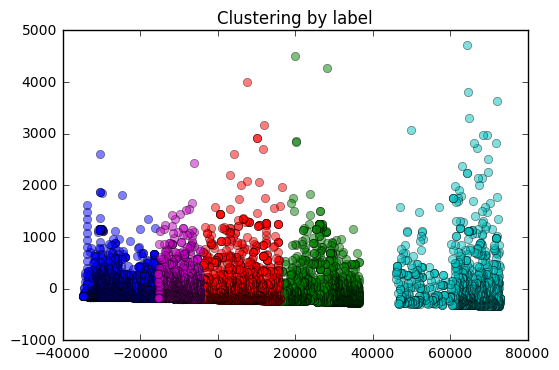

In [14]:
# data = df_features[['client_age_at_entry','days_enrolled']]
agc = AgglomerativeClustering(n_clusters=5)
agc.fit(X_pca)
label = agc.labels_
fig = plt.figure()
for l in np.unique(label):
    plt.plot(X_pca.iloc[ label == l, 0], X_pca.iloc[ label == l, 1],'o',alpha =0.5)
    plt.title('Clustering by label')

## Segment data by project type

In [15]:
Projects = [u'project_type_code_emergencyshelter',
       u'project_type_code_homelessnessprevention', u'project_type_code_other',
       u'project_type_code_permanentsupportivehousing',
       u'project_type_code_rapidrehousing', u'project_type_code_servicesonly',
       u'project_type_code_streetoutreach',
       u'project_type_code_transitionalhousing']

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2')

In [17]:
# df_features[p].shape

In [18]:
# df_features.iloc[:,df_features.columns != p].shape

In [19]:
## be sure to drop NAN and inf first

## loop through all possible projects and look at the difference of excluding one


//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


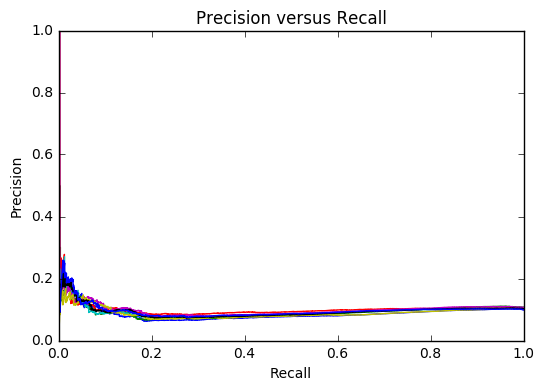

In [20]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve,f1_score

for p in Projects:
    features = df_features.iloc[:,df_features.columns != p]
    target = df_features['in_permanent_housing']
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.70)
    lr.fit(X_train,y_train)
    y_pred = lr.predict_proba(X_test)[:,1]
    prec, rec, thresh = precision_recall_curve(y_test,y_pred)
    plt.plot(rec,prec)
    plt.title('Precision versus Recall')
    plt.ylabel('Precision')
    plt.xlabel('Recall')

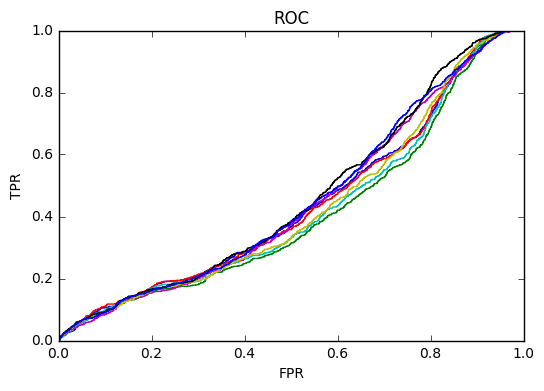

In [21]:
for p in Projects:
    features = df_features.iloc[:,df_features.columns != p]
    target = df_features['in_permanent_housing']
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.70)
    lr.fit(X_train,y_train)
    y_pred = lr.predict_proba(X_test)[:,1]
    fpr, tpr, thresh_ =  roc_curve(y_test,y_pred)
    plt.plot(fpr,tpr)
    plt.title('ROC')
    plt.ylabel('TPR')
    plt.xlabel('FPR')

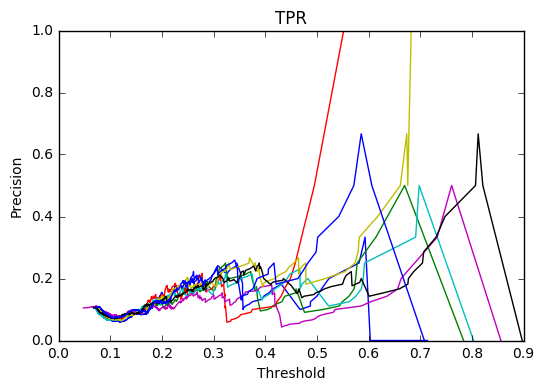

In [22]:
for p in Projects:
    features = df_features.iloc[:,df_features.columns != p]
    target = df_features['in_permanent_housing']
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.70)
    lr.fit(X_train,y_train)
    y_pred = lr.predict_proba(X_test)[:,1]
    prec, rec, thresh = precision_recall_curve(y_test,y_pred)
    prec = list(prec)
    prec.pop()
    plt.plot(thresh,prec)
    plt.title('TPR')
    plt.ylabel('Precision')
    plt.xlabel('Threshold')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in divide


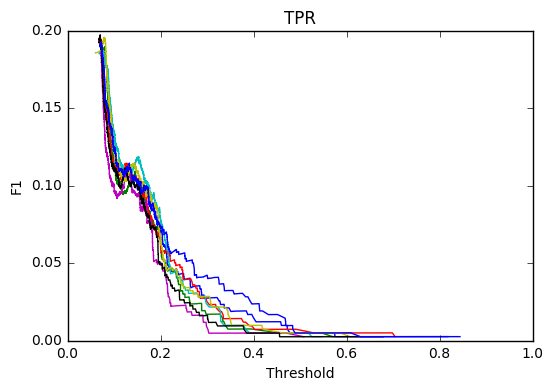

In [23]:
for p in Projects:
    features = df_features.iloc[:,df_features.columns != p]
    target = df_features['in_permanent_housing']
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.70)
    result = lr.fit(X_train,y_train)
    y_pred = lr.predict_proba(X_test)[:,1]
    prec, rec, thresh = precision_recall_curve(y_test,y_pred)
    F1 = 2 * (prec * rec) / (prec + rec)
    thresh = list(thresh)
    thresh.append(1)
    plt.plot(thresh,F1)
    plt.title('TPR')
    plt.ylabel('F1')
    plt.xlabel('Threshold')

In [24]:
np.exp(lr.coef_)[0]

array([ 0.99999067,  1.00000081,  1.00019213,  1.00000645,  1.00080043,
        0.99999991,  0.99998911,  0.99999989,  0.99964483,  0.99999083,
        1.00000329,  0.99999853,  0.99998849,  1.00000424,  0.99999991,
        1.000014  ,  0.99999601,  0.99964638,  1.00000035,  0.99999988,
        0.99999975,  0.99999519,  1.00000727,  1.00007027,  0.99999711,
        0.99987403,  0.99998502,  0.99999903,  0.99999088,  0.99999987,
        0.99999201,  0.99999551,  0.99999458,  0.99998969,  0.99999995,
        0.99999543,  1.00000011,  0.99999972,  1.0000004 ,  0.99997969,
        1.        ,  0.99998051,  1.00000921,  0.99999506,  0.99988217,
        1.00000916,  0.99997566,  0.99960049,  1.00003767,  0.99998698,
        0.99999932,  1.00005018,  0.99999559,  0.99999131,  0.99999706,
        1.00000048,  1.00000164,  1.00000049,  0.99999884,  0.99999414,
        1.00008607,  0.99999975,  1.00002971,  1.00000043,  1.00000019,
        0.99999281,  1.00000056,  1.00000016,  0.99999972,  0.99

## Looking at the odds: for only one trained model

In [25]:
odds_df = pd.DataFrame([df_features.columns,np.exp(lr.coef_)[0],lr.coef_[0]]).T
odds_df.columns =['feature','odd_ratio','coef']
odds_df['odds'] = odds_df['odd_ratio']*odds_df['coef'].apply(lambda x: np.sign(x))
odds_df.head()

,feature,odd_ratio,coef,odds
0,Personal ID,0.999991,-9.32734e-06,-0.999991
1,chronic_homeless,1,8.14561e-07,1
2,client_age_at_entry,1.00019,0.000192111,1.00019
3,continuously_homeless_one_year,1.00001,6.44836e-06,1.00001
4,days_enrolled,1.0008,0.000800109,1.0008


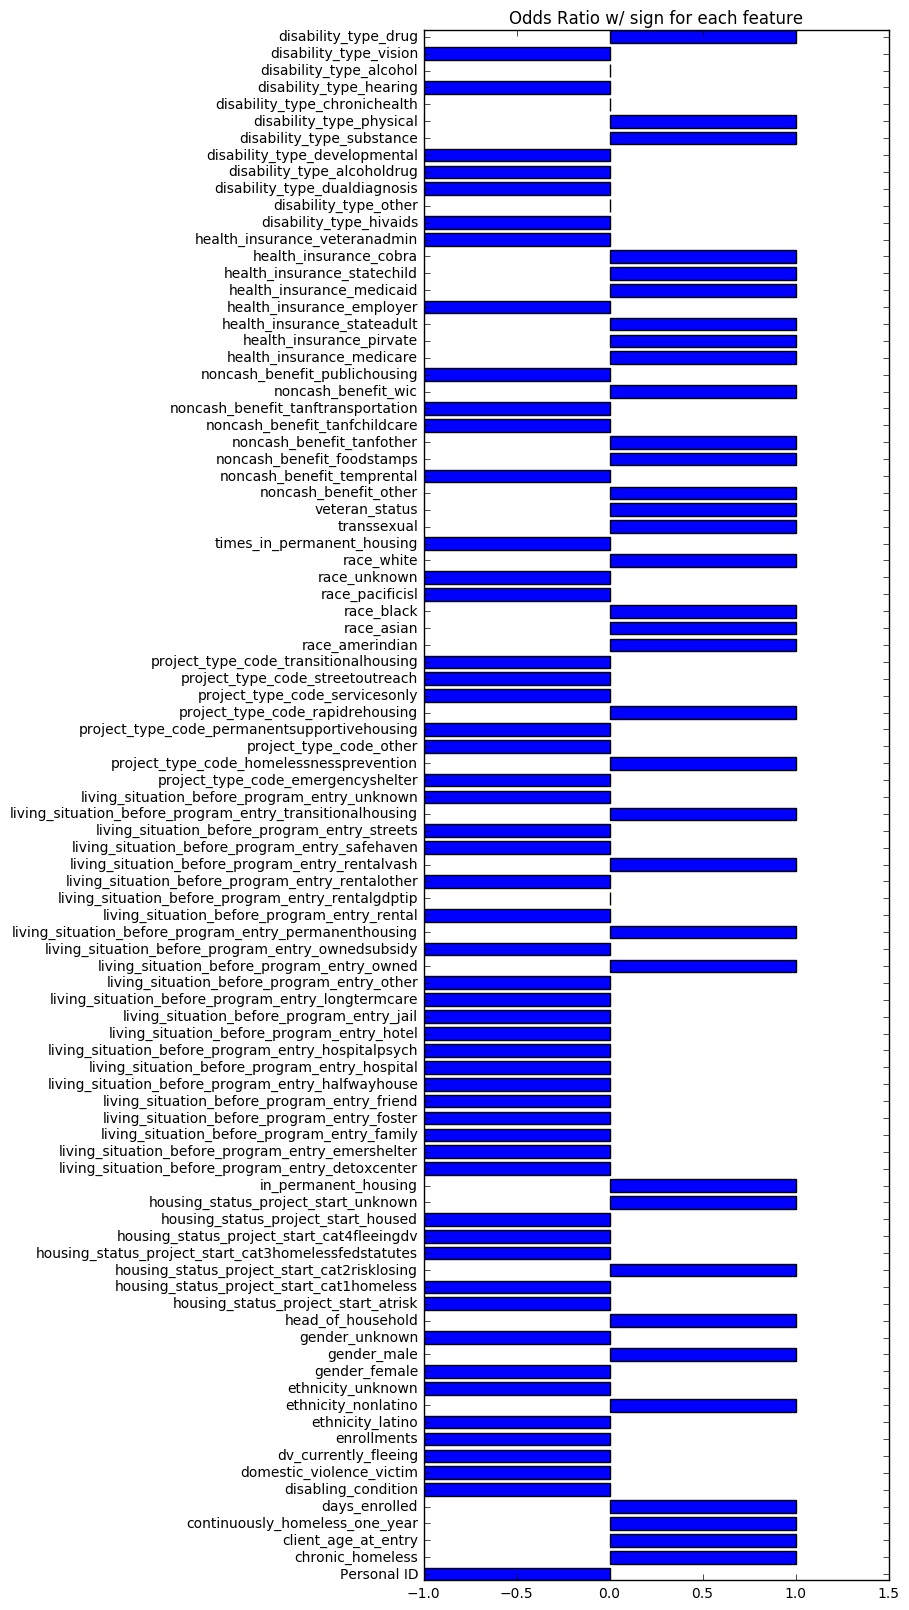

In [26]:
fig, ax = plt.subplots(figsize=(6, 20))  
width = 0.75 # the width of the bars 
ind = np.arange(odds_df['feature'].shape[0])  # the x locations for the groups
ax.set_yticks(ind+width/2)
ax.set_yticklabels(odds_df['feature'])
ax.barh(ind, odds_df['odds'], width, color="blue")
plt.title('Odds Ratio w/ sign for each feature')

## I really want to look at if a program or project actually impacts whether or not it, along with other features, influences whether or not people escape being homeless

In [27]:
df_features[Projects]

,project_type_code_emergencyshelter,project_type_code_homelessnessprevention,project_type_code_other,project_type_code_permanentsupportivehousing,project_type_code_rapidrehousing,project_type_code_servicesonly,project_type_code_streetoutreach,project_type_code_transitionalhousing
0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0
6,191,0,4,0,0,0,0,1
7,1,0,0,0,0,0,0,0
8,1,0,2,0,0,2,3,0
9,69,0,0,0,0,0,0,0


In [ ]:
df_features.head()

## Segment and look at the data more

In [ ]:
df_features.groupby(Projects[2]).sum().plot(kind = 'hist')

## For each project, count the number of unique people in the project. Maybe just focus on visualization and less on prediction.